In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("logs.csv", header=None)

In [3]:
names = df[7].unique()

In [4]:
df[1] = df[1].apply(datetime.strptime, args=("%Y.%m.%d. %H:%M:%S",))

In [5]:
df.index = df[0]
dfcp = df.drop(columns=[0, 3, 4, 6, 8, 9, 10, 11])
dfcp["hour"] = dfcp[1].apply(lambda x: x.hour)
dfcp["day"] = dfcp[1].apply(lambda x: x.day)

Text(0.5, 1.0, 'All Records of Jan by Hours of Day')

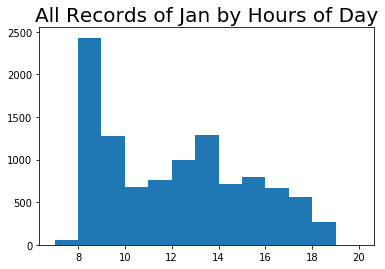

In [6]:
dfcp["hour"].hist(bins=13, range=[7, 20], align="mid", grid=False)
plt.title("All Records of Jan by Hours of Day", fontsize=20)

Text(0.5, 1.0, 'All Records of Jan by Day of Month')

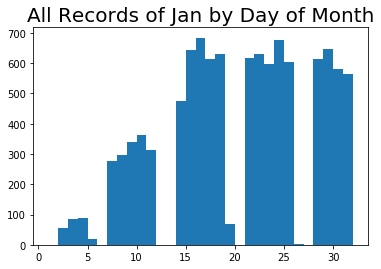

In [7]:
dfcp["day"].hist(bins=31, range=[1, 32], align="mid", grid=False)
plt.title("All Records of Jan by Day of Month", fontsize=20)

In [8]:
dfcp2 = dfcp.drop_duplicates([7, "day"])

Text(0.5, 1.0, 'First Records by Day of Month')

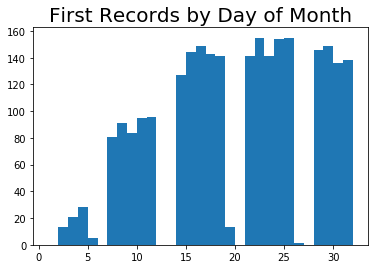

In [9]:
dfcp2["day"].hist(bins=31, range=[1, 32], align="mid", grid=False)
plt.title("First Records by Day of Month", fontsize=20)

In [10]:
dfcp2.head()

,1,2,5,7,12,hour,day
0,,,,,,,
1,2019-01-02 09:21:49,Access granted,A66 - 04 FÕBEJÁRAT (F-1) Door #1,Czender András,00215:09895,9,2
3,2019-01-02 09:29:15,Access granted,A66 - 12 Recepció (2-1) Door #1,Puskás Nóra,00059:58046,9,2
5,2019-01-02 09:36:51,Access granted,A66 - 04 FÕBEJÁRAT (F-1) Door #1,Ripka Péter,00110:57041,9,2
7,2019-01-02 09:44:46,Access granted,A66 - 04 FÕBEJÁRAT (F-1) Door #1,Szívós István,00008:58673,9,2
9,2019-01-02 10:02:19,Access granted,A66 - 04 FÕBEJÁRAT (F-1) Door #1,Megyaszai Dániel,00055:39162,10,2


In [11]:
dfcp2 = dfcp2[dfcp2["day"] >= 14]
dfcp2 = dfcp2[~dfcp2["day"].isin([5, 6, 12, 13, 19, 20, 26, 27])]

Text(0.5, 1.0, 'First Records by Day of Month')

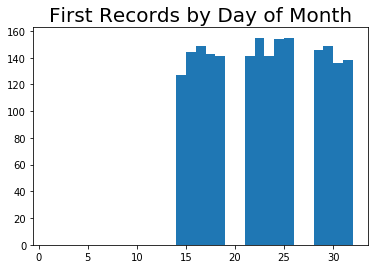

In [12]:
dfcp2["day"].hist(bins=31, range=[1, 32], align="mid", grid=False)
plt.title("First Records by Day of Month", fontsize=20)

Text(0.5, 1.0, 'Individual Working Days')

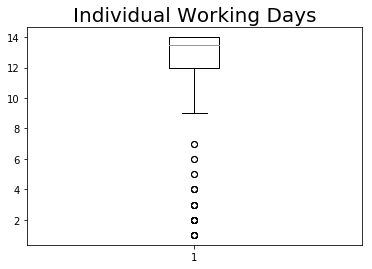

In [13]:
count = dfcp2.groupby(7)[2].count()
plt.boxplot(count.sort_values(ascending=False).values)
plt.title("Individual Working Days", fontsize=20)

In [14]:
dfcp2 = dfcp2[dfcp2[7].isin(count[count >= 11].index)]

Text(0.5, 1.0, 'Record by Hour of Day')

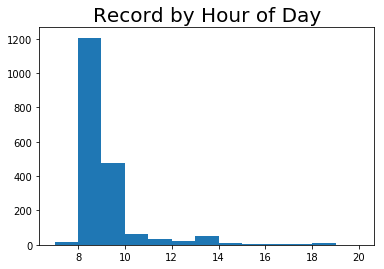

In [15]:
dfcp2["hour"].hist(bins=13, range=[7, 20], align="mid", grid=False)
plt.title("Record by Hour of Day", fontsize=20)

In [16]:
dfcp3 = dfcp2.copy()

In [17]:
dfcp3["min"] = dfcp3[1].apply(lambda x: x.minute)
dfcp3["sec"] = dfcp3[1].apply(lambda x: x.second)
dfcp3["hourover9"] = dfcp3["hour"] - 9

In [18]:
dfcp3.head()

,1,2,5,7,12,hour,day,min,sec,hourover9
0,,,,,,,,,,
1832,2019-01-14 07:58:17,Access granted,A66 - 04 FÕBEJÁRAT (F-1) Door #1,Barczi Mihály,00070:04181,7,14,58,17,-2
1834,2019-01-14 08:26:32,Access granted,A66 - 04 FÕBEJÁRAT (F-1) Door #1,Barish Nilofer Virág,00018:06288,8,14,26,32,-1
1836,2019-01-14 08:27:48,Access granted,A66 - 04 FÕBEJÁRAT (F-1) Door #1,Barta Gergõ,00243:07476,8,14,27,48,-1
1837,2019-01-14 08:28:26,Access granted,A66 - 04 FÕBEJÁRAT (F-1) Door #1,Takács Róbert,00178:59777,8,14,28,26,-1
1838,2019-01-14 08:29:22,Access granted,A66 - 04 FÕBEJÁRAT (F-1) Door #1,Salfay Anna,00161:44433,8,14,29,22,-1


In [19]:
bol1 = (dfcp3["min"] > 0) | (dfcp3["sec"] > 0)
bol2 = bol1 & (dfcp3["hourover9"] == 0)
bol3 = bol2 | (dfcp3["hourover9"] > 0)

In [20]:
dfcp3 = dfcp3[bol3]

In [21]:
dfcp3["lateInMin"] = dfcp3["hourover9"] * 60 + dfcp3["min"] + dfcp3["sec"] / 60

In [22]:
dfcp3[5].unique()

array(['A66 - 04 FÕBEJÁRAT (F-1) Door #1',
       'A66 - 06 Kávézó terasz (F-3) Door #1',
       'A66 - 12 Recepció (2-1) Door #1',
       'A66 - 17 Recepció (3-1) Door #1',
       'A66 - 18 Elõtér 316 (3-2) Door #1',
       'A66 - 07 Recepció (1-1) Door #1'], dtype=object)

In [23]:
dfcp3.sort_values("lateInMin", ascending=False).head()

,1,2,5,7,12,hour,day,min,sec,hourover9,lateInMin
0,,,,,,,,,,,
8682,2019-01-28 18:16:39,Access granted,A66 - 04 FÕBEJÁRAT (F-1) Door #1,Balogh Botond,00144:27781,18,28,16,39,9,556.650000
2303,2019-01-14 18:11:00,Access - door opened,A66 - 04 FÕBEJÁRAT (F-1) Door #1,Ivány Melinda Lili,00008:42946,18,14,11,0,9,551.000000
9908,2019-01-30 18:07:57,Access granted,A66 - 04 FÕBEJÁRAT (F-1) Door #1,Tóth Márk,00182:60961,18,30,7,57,9,547.950000
2302,2019-01-14 18:07:38,Access - door opened,A66 - 04 FÕBEJÁRAT (F-1) Door #1,Nagy Orsolya,00239:14514,18,14,7,38,9,547.633333
2298,2019-01-14 18:05:09,Access granted,A66 - 17 Recepció (3-1) Door #1,Puskás Tamás,00241:05554,18,14,5,9,9,545.150000


In [24]:
dfcp3[dfcp3[7] == "Balogh Botond"]

,1,2,5,7,12,hour,day,min,sec,hourover9,lateInMin
0,,,,,,,,,,,
2069,2019-01-14 13:32:19,Access granted,A66 - 06 Kávézó terasz (F-3) Door #1,Balogh Botond,00144:27781,13,14,32,19,4,272.316667
7313,2019-01-24 14:37:40,Access granted,A66 - 12 Recepció (2-1) Door #1,Balogh Botond,00144:27781,14,24,37,40,5,337.666667
8682,2019-01-28 18:16:39,Access granted,A66 - 04 FÕBEJÁRAT (F-1) Door #1,Balogh Botond,00144:27781,18,28,16,39,9,556.650000


In [25]:
dfcp3[dfcp3[7] == "Ivány Melinda Lili"]

,1,2,5,7,12,hour,day,min,sec,hourover9,lateInMin
0,,,,,,,,,,,
2303,2019-01-14 18:11:00,Access - door opened,A66 - 04 FÕBEJÁRAT (F-1) Door #1,Ivány Melinda Lili,00008:42946,18,14,11,0,9,551.000000
9524,2019-01-30 09:27:11,Access granted,A66 - 04 FÕBEJÁRAT (F-1) Door #1,Ivány Melinda Lili,00008:42946,9,30,27,11,0,27.183333


In [26]:
dfcp3[dfcp3[7] == "Tóth Márk"]

,1,2,5,7,12,hour,day,min,sec,hourover9,lateInMin
0,,,,,,,,,,,
1905,2019-01-14 09:02:30,Access granted,A66 - 06 Kávézó terasz (F-3) Door #1,Tóth Márk,00182:60961,9,14,2,30,0,2.500000
2537,2019-01-15 09:29:53,Access granted,A66 - 18 Elõtér 316 (3-2) Door #1,Tóth Márk,00182:60961,9,15,29,53,0,29.883333
3137,2019-01-16 09:16:01,Access granted,A66 - 04 FÕBEJÁRAT (F-1) Door #1,Tóth Márk,00182:60961,9,16,16,1,0,16.016667
3833,2019-01-17 09:30:09,Access granted,A66 - 04 FÕBEJÁRAT (F-1) Door #1,Tóth Márk,00182:60961,9,17,30,9,0,30.150000
4457,2019-01-18 09:37:00,Access granted,A66 - 04 FÕBEJÁRAT (F-1) Door #1,Tóth Márk,00182:60961,9,18,37,0,0,37.000000
5127,2019-01-21 09:06:22,Access granted,A66 - 04 FÕBEJÁRAT (F-1) Door #1,Tóth Márk,00182:60961,9,21,6,22,0,6.366667
5765,2019-01-22 09:13:59,Access granted,A66 - 04 FÕBEJÁRAT (F-1) Door #1,Tóth Márk,00182:60961,9,22,13,59,0,13.983333
6385,2019-01-23 09:25:38,Access granted,A66 - 04 FÕBEJÁRAT (F-1) Door #1,Tóth Márk,00182:60961,9,23,25,38,0,25.633333
6991,2019-01-24 09:13:29,Access granted,A66 - 04 FÕBEJÁRAT (F-1) Door #1,Tóth Márk,00182:60961,9,24,13,29,0,13.483333
